In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [26]:
diabetes_dataset = pd.read_csv('diabetes_prediction_dataset.csv')

train_dataset, test_dataset = train_test_split(diabetes_dataset, test_size=0.3, random_state=42)

# Gerar e salvar novo dataset contendo dados negativos
diabetes_negative = train_dataset.loc[diabetes_dataset['diabetes'] == 0]

# diabetes_positive = diabetes_dataset.loc[diabetes_dataset['diabetes'] == 1]

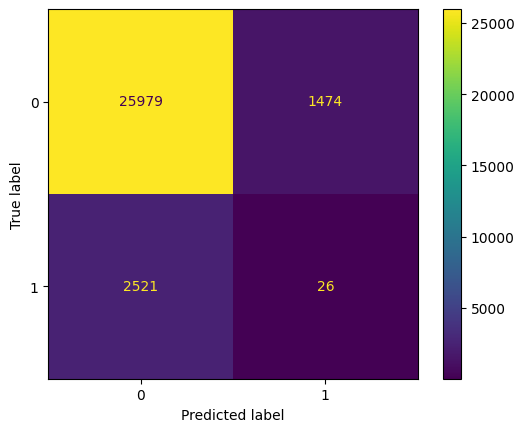

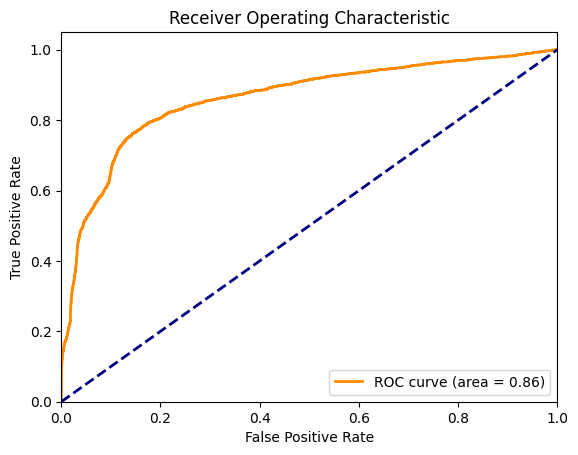

Área sob a curva ROC: 0.8615180492437723
Acurácia: 0.8668333333333333 
Revocação: 0.010208087946603848 
Precisão: 0.017333333333333333 
F1 score: 0.012849023968371634


In [28]:
X_train = diabetes_negative.drop(columns=['diabetes'])
X_test = test_dataset.drop(columns=['diabetes'])
y_test = test_dataset['diabetes']

# Codifica as colunas 'gender', 'smoking_history'
columns_to_encode = ['gender', 'smoking_history']
X_train_encoded = pd.get_dummies(X_train, columns=columns_to_encode)
X_test_encoded = pd.get_dummies(X_test, columns=columns_to_encode)

scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_encoded)

X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

gmm = GaussianMixture(n_components=50, random_state=42, covariance_type='full')
gmm.fit(X_train_scaled)

test_scores = gmm.score_samples(X_test_scaled)

# Calcule a curva ROC e a área sob a curva para cada componente
fpr, tpr, thresholds = roc_curve(y_test, -test_scores)  # Note a negação de test_scores
roc_auc = auc(fpr, tpr)

threshold = np.percentile(-test_scores, 5)
y_pred = (-test_scores < threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm).plot()

# Plote a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print('Área sob a curva ROC:', roc_auc)
print(f"Acurácia: {accuracy} \nRevocação: {recall} \nPrecisão: {precision} \nF1 score: {f1}")
